# Tarea 8 - Machine Learning

In [63]:
#Librerias y funciones
import random
import matplotlib.pyplot as plt

def opt_knsapsack(v,w,C):
    """
    Parametro v: valores de items
    Parametro w: pesos de los items
    Parametro C: capacidad de mochila
    """
    N = len(v)
    m = {}

    for c in range(C+1):
        m[(0,c)] = 0
    for i in range(1,N+1):
        for c in range(C+1):
            if w[i-1]<=c:
                m[(i,c)] = max(m[i-1,c], v[i-1]+m[(i-1,c-w[i-1])])
            else:
                m[(i,c)] = m[(i-1,c)]
    return m[(N,C)]

def gen_pob_in(lista_items): #Creacion de poblacion inicial
    pob = []
    for i in range(len(lista_items)):
        pob.append(random.randint(0,1))
    return pob

def rev_sol(lista_items, pob_inicial, cap_limite):
    peso_total = 0
    for i in range(len(pob_inicial)):
        if pob_inicial[i] == 1:
            peso_total += lista_items[i][1]
        if peso_total > cap_limite:
            return False
    return True

def calc_valor(lista_items, pob_inicial):
    total = 0
    for i in range(len(pob_inicial)):
        if pob_inicial[i] == 1:
            total += lista_items[i][2]
    return total

def chequeo_duplicados(s_1,s_2):
    for i in range(len(s_1)):
        if s_1[i]!=s_2[i]:
            return False
    return True

def pob_inicial(tam_pob, lista_items, cap_limite):
    poblacion = []
    i=0
    while i < tam_pob:
        nueva_sol = gen_pob_in(lista_items)
        if rev_sol(lista_items, nueva_sol, cap_limite):
            if len(poblacion) == 0:
                poblacion.append(nueva_sol)
                i+=1
            else:
                skip = False
                for j in range(len(poblacion)):
                    if chequeo_duplicados(nueva_sol, poblacion[j]):
                        skip=True
                        continue
                if not skip:
                    poblacion.append(nueva_sol)
                    i+=1
    return poblacion

def sel_tournament(pob):
    ticket1 = random.randint(0,len(pob)-1)
    ticket2 = random.randint(0,len(pob)-1)
    if calc_valor(lista_items, pob[ticket1]) > calc_valor(lista_items, pob[ticket2]):
        winner = pob[ticket1]
    else:
        winner = pob[ticket2]
    return winner

def crossover(p_1, p_2):
    break_point = random.randint(0,len(p_1))
    p_parte = p_1[:break_point]
    s_parte = p_2[break_point:]
    hijo = p_parte + s_parte
    if rev_sol(lista_items, hijo, cap):
        return hijo
    else:
        return crossover(p_1, p_2)

def mutacion(cromosoma):
    temp = cromosoma
    mut_index_1, mut_index_2 = random.sample(range(0, len(cromosoma)),2)
    temp[mut_index_1], temp[mut_index_2] = temp[mut_index_2], temp[mut_index_1]
    if rev_sol(lista_items, temp, cap):
        return temp
    else:
        return mutacion(cromosoma)

def creacion_gen(pob, tasa_mut):
    nueva_gen = []
    for i in range(len(pob)):
        padre_1 = sel_tournament(pob)
        padre_2 = sel_tournament(pob)
        hijo = crossover(padre_1, padre_2)
        
        if random.random() < tasa_mut:
            hijo = mutacion(hijo)
            
        nueva_gen.append(hijo)
    return nueva_gen

def best_sol(gen, lista_items):
    best = 0
    for i in range(len(gen)):
        temp = calc_valor(lista_items, gen[i])
        if temp > best:
            best = temp
    return best

def gen_algorithm(cap, tam_pob, tam_gen, tasa_mut, lista_items):
    pob = pob_inicial(tam_pob, lista_items, cap)
    for i in range(0,tam_gen):
        pob = creacion_gen(pob, tasa_mut)
        print(pob[0])

        print('valor --> ', calc_valor(lista_items, pob[0]))
        lista_valores.append(best_sol(pob, lista_items))
    return pob, lista_valores

## Ejercicio 1

La ecuación fundamental de la programación dinámica se usa para resolver problemas de optimización iterativa. El "problema de la mochila" es uno de los mejores clásicos que se utilizan para demostrar el funcionamiento de este tipo de modelos. Partiendo del siguiente ejemplo, desarrolla la segunda parte del algoritmo 

El problema de la mochila es un ejemplo de optimización combinatoria que busca entre un conjunto finito de posibles soluciones, la mejor posible. Deriva su nombre de modelar una situación parecida al llenado de una mochila, la cual solo puede soportar una cantidad limitada de peso y debe portar un conjunto restringido de objetos en su interior, catalogados por un valor y peso determinado.

El objetivo en esta situación consiste en maximizar el valor total que aportan los objetos, colocando en la mochila solo los adecuados y sin sobrepasar el peso máximo (López, 2017).

### El problema de la mochila
Dado **N** objetos donde cada objeto tiene un peso y beneficio asignado, además,
dada una mochila con capacidad **W**, i.e. la mochila puede soportar hasta **W** peso en ella. La tarea recae en poner los objetos en la mochila tal que la suma de las cantidades sea la máxima posible. Un ejemplo es el siguiente:

Supongamos que se cuenta con los siguientes pesos y beneficios de cada objeto:

$$P = {1,2,5,6}$$

$$W = {2,3,4,5}$$

Y la mochila tiene la siguiente capacidad de $m=8$ y un total de $n=4$ objetos.

El objetivo es encontrar el mayor beneficio y que además cumpla con el objetivo máximo en la mochila. Una forma de resolverlo es iterando sobre todas las posibles combinaciones con el fin de encontrar el mayor beneficio, algo así:
- $x_{1} = {1,0,0,0}$
- $x_{2} = {0,1,0,0}$
- ...

Y así sucesivamente de tal manera que se cumpla lo siguiente:

$$\sum w_{i}x_{i}<=m$$

Sin embargo, esta opción representaría un total de $2^{n}$ iteraciones, lo cual puede ser computacionalmente caro. Por ende, se puede realizar una tabulación sobre la capacidad máxima de la mochila, de la siguiente manera:

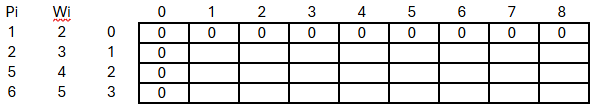

La tabla es una representación de los 8 espacios disponibles en la mochila y buscará mostrar el beneficio de cada objeto y comparándolo con todos los pesos disponibles.

Tal como se observa, el valor de la primer columna y fila es 0, esto se debe a que representa cuando se cargue la mochila con 0 objetos, dando un beneficio de 0.

Posteriormente, se carga la mochila con 1 objeto, sin embargo, el peso mínimo de los objetos es de 2, por ende, la celda $(1,1)$ también será 0, debido a la inexistencia de un objeto con peso 1, y el resto de las celdas de $(1,i)$ será de 1, puesto que es el beneficio máximo cuando se considera 1 objeto de peso mínimo de 2.

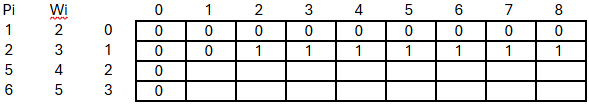

La siguiente iteración sobre 2 objetos, se considera tanto los beneficios, como los pesos de la iteración pasada, es decir, la celda $(2,2)$ contendrá el beneficio de 1, pues, considerando los dos objetos, el peso máximo permitido es el del objeto 1, siendo 2 el peso y 1 el beneficio. Por otro lado, el valor de la celda $(2,3)$ es de 2, puesto que el beneficio máximo de los dos objetos con un peso máximo de 3, es de 2. Si se utiliza la misma lógica en el resto de las celdas, se llega al siguiente resulado

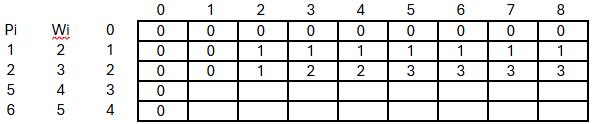

Existe una manera más sencilla y es justo la fórmula de la programación dinámica, siendo la siguiente operación:

$$V[i,w] = max\{V[i-1,w], V[i-1, w-w[i]] + P[i]\}$$

Donde:
- $V$ representa las filas
- $w$ representa las columnas

Así, entonces, si buscamos el valor correspondiente a $V[3,1]$ será:

$$V[3,1] = max\{V[3-1,1], V[3-1,1-w[3]]+P[3]\}$$

Donde
- $w[3] = 4$
- $P[3] = 5$

Sustituyendo los valores y resolviendo, obtenemos:

$$V[3,1] = max\{V[2,1], V[2,-3]+5\}$$

Dado que no existe el valor $V[2,-3]$ el valor máximo es $V[2,1]=0$, siguiendo esta fórmula, se sustituye el resto de los valores de la tabla, obteniendo:

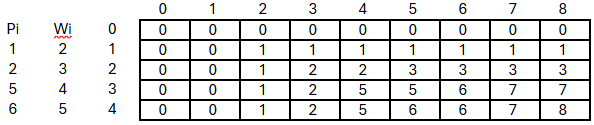

Así, los objetos elegidos serán:

$$\{0,1,0,1\} = 8$$

**Utilizando la opción de estados S**

Recordemos:

$$P = {1,2,5,6}$$

$$W = {2,3,4,5}$$

Se tiene que enlistar los posibles estados que se puedan enunciar de la siguiente manera

$$(P,W)$$

- $S^{0} = \{(0,0)\}$: Siendo el Beneficio y Peso mínimo de 0,0
- $S^{0}_{1} = \{(1,2)\}$: Añadiendo el Beneficio y Peso del primer objeto.
- $S^{1} = \{(0,0),(1,2)\}$: Se añade al siguiente estado el Beneficio y Peso de $S^{0}_{1}$
- $S^{1}_{1} = \{(2,3),(3,5)\}$: Añadiendo el Beneficio y Peso del segundo objeto
- $S^{2} = \{(0,0),(1,2),(2,3)(3,5)\}$
- $S^{2}_{1} = \{(5,4),(6,6),(7,7),(8,9)\}$: Se sigue añadiendo el Beneficio y Peso del tercer objeto, sin embargo, la última opción sobrepasa el Peso permitido en la mochila, por ende, se elimina.
- $S^{3}=\{(0,0),(1,2),(2,3),(3,5),(5,4),(6,6),(7,7)\}$: Se sigue añadiendo al siguiente estado, sin embargo, el paso $(5,4)$ reduce el peso anterior, por ende, se elimina $(3,5)$.
- $S^{3}_1 = \{(6,5),(7,7),(8,8),(11,9),(12,11),(13,12)\}$: Se vuelve a añadir al estado anterior, sin embargo, a partir de $(11,9)$ sobrepasa el peso admitido.
- $S^{4} = \{(0,0),(1,2),(2,3),(5,4),(6,6),(7,7),(8,8)\}$: De tal manera que obtenemos el beneficio y peso máximo.

Para saber qué objetos son los que se tienen que considerar, faltaría realizar:

1. Si $(8,8)\in S^{4}$ y $(8,8)\notin S^{3}$ Entonces, $X_{4}=1$. Se resta el Beneficio y Peso del objeto en esa posición, $(8-6,8-5) = (2,3)$
2. Si $(2,3)\in S^{3}$ y $(2,3)\in S^{2}$ Entonces $X_{3} = 0$
3. Si $(2,3)\in S^{2}$ y $(2,3)\notin S^{1}$ Entonces, $X_{2}=1$. Se resta el Beneficio y Peso del objeto en esa posición, $(2-2,3-3) = (0,0)$
4. Si $(0,0)\in S^{1}$ y $(0,0)\in S^{0}$ Entonces $X_{1} = 0$

Llegando al mismo resultado de

$$\{0,1,0,1\} = 8$$

In [42]:
v = [500,250,1500,1200,1200,1000,800,950] #Beneficio
w = [4,  3,  10,  12,  9,   5,   6,  7] #Peso
C = 28 #Capacidad

#Retorna el beneficio máximo
opt_knsapsack(v,w,C)

4250

## Ejercicio 2

Investiga sobre cinco aplicaciones actuales donde se implemente el aprendizaje reforzado e identifica en cada una de estas el proceso correspondiente a la exploración y a la explotación. Argumenta la importancia de mantener el balance entre estos dos elementos.

### Reinforcement Learning (Aprendizaje Reforzado)

Antes de mencionar las aplicaciones, recordemos qué es el aprendizaje reforzado. Esta es una técnica de Machine Learning que entrena el software para que tome decisiones y logre los mejores resultados. Imita el proceso de aprendizaje por ensayo y error que los humanos utilizan para lograr sus objetivos. Las acciones de software que trabajan para alcanzar su objetivo se refuerzan, mientras que las que se apartan del objetivo se ignoran.

Los algoritmos de RL utilizan un paradigma de recompensa y castigo al procesar los datos. Aprenden de los comentarios de cada acción y descubren por sí mismos las mejores rutas de procesamiento para lograr los resultados finales. Los algoritmos también son capaces de funcionar con gratificación aplazada. La mejor estrategia general puede requerir sacrificios a corto plazo, por lo que el mejor enfoque descubierto puede incluir algunos castigos o dar marcha atrás en el camino. El RL es un potente método que ayuda a los sistemas de inteligencia artificial a lograr resultados óptimos en entornos visibles.

- Exploración: Se refiere a la acción de probar nuevas opciones o acciones para descubrir su valor y aprender más sobre el entorno. Es un proceso donde el agente no está necesariamente eligiendo la acción que le da la mayor recompensa inmediata, sino que está buscando mejorar su conocimiento a largo plazo.
- Explotación: Es el proceso en el cual el agente selecciona las acciones que ya sabe que le traerán la mayor recompensa, basándose en su experiencia pasada.

Dicho balance determina el equilibrio entre ambos datos. Si un agente explora demasiado, puede no aprovechar las buenas estrategias que ya ha aprendido. Si explota demasiado, puede quedarse atrapado en subóptimos, sin descubrir mejores alternativas.



Algunas aplicaciones son:

1. Sistemas de recomendación como Netflix
   - **Exploracion**: Durante el entrenamiento, requieren de distintas series, películas o programas vistos por los usuarios con el fin de presentarles mejores recomendaciones 
   - **Explotacipon**: Utilizando el historial del usuario, tanto películas o programas vistos más de una vez, frecuencias, etc.
2. Vehículos como Tesla
   - **Exploración**: Requieren explorar de distintos caminos, reacciones ante distintos imprevistos y patrones en tráfico con el fin de mejorar sus algoritmos.
   - **Explotación**: Una vez probada toda la exploración, elige la ruta más eficiente.
3. Comercio, Trading
   - **Exploración**: Prueban diferentes estrategias de inversión basados en predicción de tendencias o arbitraje, con el fin de mejorar la rentabilidad 
   - **Explotación**: 
4. Desafíos de optimización
   - **Exploración**: Usualmente se utiliza el set de entrenamiento y los resultados vistos con el fin de mejorar el rendimiento y optimizar mejor el modelo.
   - **Explotacion**: Una vez explorados todos los posibles sets de entrenamiento, se brinda la mejor optimización del modelo.
5. Videojuegos como alphago
   - **Exploración**: Este fue uno de los primeros videojuegos utilizando IA como forma de aprendizaje con el fin de presentarle un mayor reto al jugador midiéndolo por sus habilidades, esto a partir de las estrategias aprendidas con anterioridad.
   - **Explotacion**: Este videojuego aprendía a base de los juegos recientes con el fin de probarse de mejor manera ante el oponente

## Ejercicio 3

Utilizando el siguiente material, identifica 3 aplicaciones donde se implementen los algoritmos evolutivos. Selecciona uno de estos algoritmos y localiza una investigación científica perteneciente a los últimos 6 meses donde se haga uso de estos datos.

**Inteligencia de enjambre**

La inteligencia de enjambre es un término general que se utiliza para referenciar a los algoritmos que están influenciados por los aspectos biológicos del comportamiento de diversos grupos de organismos biológicos del comportamiento de diversos grupos de organismos primitivos, los cuales se rigen por reglas de conducta individual y grupal siendo capaces de lograr desempeños muy complejos de manera colectiva.

El origen de las técnicas de inteligencia de enjambre se romonta a 1987, cuando Craig Reynolds publicó un artículo donde describía este tipo de comportamiento (Wu y Song, 2021). En su investigación, Reynolds diseñó un sistema de bandada de pájaros y asignó un conjunto de reglas para regular el comportamiento de cada una de las aves dentro del grupo. 

Según Joshi (2019), los pasos que se necesitan para diseñar un algoritmo basado en la inteligencia de enjambre son los siguientes:

- Inicializar el sistema introduciendo un entorno adecuado mediante la definición de restricciones
- Inizializar el organismo individual definiendo las reglas de posibles acciones y formas de comunicarse con los demás
- Establecer el número de organismos y el periodo de evolución
- Definir las metas individuales para cada organismo y las metas grupales para todo el grupo, así como los criterios de finalización del algoritmo
- Definir el factor de aleatoriedad que afectará las decisiones que tomen los organismos individuales al negociar entre exploración y explotación
- Repetir el proceso hasta que se cumplan los criterios de finalización.

**Aplicaciones de inteligencia de enjambre**

- Optimización de rutas: Suelen utilizarse como simulación de vehículos, donde se eligen las rutas basándose en la información del tráfico en tiempo real, con el objetivo de reducir los atascos y mejorar la fluidez del tráfico.
- Robótica: Los robots que utilizan la inteligencia de enjambre pueden colaborar para tareas de exploración, reconstrucción de ambientes o hasta trabajos industriales
- Redes y telecomunicaciones: Suelen utilizarse para la optimización de enrutamiento de datos en redes de comunicaciones.

El artículo será anexado en la entrega de este archivo, de igual manera se podrá encontrar una copia del archivo dentro de la ruta *../docs/Che_2024_J._Phys._Conf._Ser._2852_012001.pdf*. Este artículo menciona la importancia de añadir este tipo de herramientas de inteligencia artificial para mejorar el desempeño de diversos modelos conocidos en el área de Machine Learning, sobre algunos modelos conocidos, tales como e-SVR, v-SVR, BP, Random Forest. Una rama de la inteligencia de enjambre, Optimizador de Serpiente, fue utilizado para optimizar cada modelo y mostrar la mejora en distintas métricas conocidas y evaluadas.

Como manera de resumen del artículo tras haber evaluado los modelos, se obtuvo los siguientes resultados en la investigación

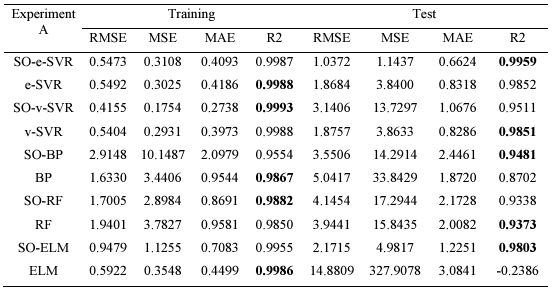

Asimismo, se mencionan las siguientes observaciones:
    Los modelos tienen distintos niveles de sensibilidad ante cambios en sus parámetros internos. Algunos modelos, como RF (Random Forest) son menos sensibles puesto que están más relacionados con sus parámetros. Por otro lado, los modelos como ELM (Extreme Learning Machines) llegan a ser más sensibles pues dependen un poco más sobre el ajusto interno de sus pesos. 

## Ejercicio 4

El problema de la mochila puede resolverse utilizando la programación genética. Identifica la problemática relacionada con los fundamentos de este ejemplo y desarrolla un programa donde se implemente un algoritmo genético para resolverlo. Repite el proceso utilizando programación dinámica y realiza una comparación 

La programación genética parte de 4 pasos principales:

1. Creación de población inicial: Se propone una población que contiene un número de soluciones definida por el desarrollador, cada solución es nombrada como *cromosoma*
2. Ajuste de medición: Se realiza un ajuste de medición con el fin de encontrar la mejor solución. *NOTA*: En caso que se encuentre la mejor solución, se termina el programa, en caso contrario, se realiza el paso 3, 4, 5.
3. Selección: Se realiza la elección de los mejores resultados individuales evaluados. Dichos resultados seleccionados son los 'padres' que serán los comparables para la siguiente generación evaluada
4. Crossover: Se realiza un crossover entre los nuevos individuos seleccionados y los padres con el fin de obtener una mejor versión de individuos.
5. Mutación: Una vez cambiados los individuos finales, se repite el paso 1 con el fin de obtener el mejor valor óptimo.


**Problema anterior**

Se contaba con la siguiente informacion

$$Capacidad = 28$$
$$Items = [1,2,3,4,5,6,7,8]$$
$$Valores = [500,250,1500,1200,1200,1000,800,950]$$
$$Pesos = [4,3,10,12,9,5,6,7]$$

In [84]:
lista_items = []

In [86]:
#Informacion inicial para programa
#Lista de items = [id,peso,beneficio]
lista_items = [[0,4,500],[1,3,250],
               [2,10,1500],[3,12,1200],
               [4,9,1200],[5,5,1000],
               [6,6,800],[7,7,950]]
cap = 28 #Capacidad
#Parametros del algoritmo genético
tam_pob = 10 #Tamaño de población inicial
tam_gen = 100 #Tamaño de generación de datos
tasa_mut = .1 #Tasa de mutación

#Plotting
lista_valores = []

[1, 1, 1, 0, 0, 0, 1, 0]
valor -->  3050
[1, 0, 0, 0, 0, 1, 1, 1]
valor -->  3250
[1, 0, 1, 0, 0, 0, 1, 1]
valor -->  3750
[1, 0, 1, 0, 0, 0, 1, 1]
valor -->  3750
[1, 0, 1, 0, 0, 0, 1, 1]
valor -->  3750
[1, 0, 1, 0, 0, 0, 1, 1]
valor -->  3750
[1, 0, 1, 0, 0, 0, 1, 1]
valor -->  3750
[1, 0, 1, 0, 0, 0, 1, 1]
valor -->  3750
[1, 0, 1, 0, 0, 0, 1, 1]
valor -->  3750
[1, 0, 1, 0, 0, 0, 1, 1]
valor -->  3750
[1, 0, 1, 0, 0, 0, 1, 1]
valor -->  3750
[1, 0, 1, 0, 0, 1, 1, 0]
valor -->  3800
[1, 0, 1, 0, 0, 0, 1, 1]
valor -->  3750
[1, 0, 1, 0, 0, 0, 1, 1]
valor -->  3750
[1, 0, 1, 0, 0, 1, 1, 0]
valor -->  3800
[1, 0, 1, 0, 0, 0, 1, 1]
valor -->  3750
[1, 0, 1, 0, 0, 1, 1, 0]
valor -->  3800
[1, 0, 1, 0, 0, 1, 1, 0]
valor -->  3800
[1, 0, 1, 0, 0, 1, 1, 0]
valor -->  3800
[1, 0, 1, 0, 0, 1, 1, 0]
valor -->  3800
[1, 0, 1, 0, 0, 1, 1, 0]
valor -->  3800
[1, 0, 1, 0, 0, 1, 1, 0]
valor -->  3800
[1, 0, 1, 0, 0, 1, 1, 0]
valor -->  3800
[1, 0, 1, 0, 0, 1, 1, 0]
valor -->  3800
[1, 0, 1, 0, 0, 

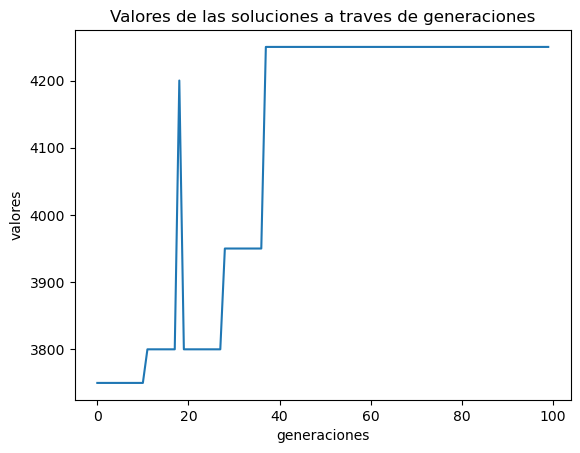

In [94]:
ult_pob, v_list = gen_algorithm(cap, tam_pob, tam_gen, tasa_mut, lista_items)

plt.plot(v_list)
plt.xlabel('generaciones')
plt.ylabel('valores')
plt.title('Valores de las soluciones a traves de generaciones')
plt.show()

**Conclusiones**

- Como se puede observar en el rendimiento del problema de la mochila utilizando el algoritmo genético, a partir de la generación *40* ya se encuentra el beneficio máximo, siendo 60 generaciones posteriores recalcan el valor máximo, que fue el mismo obtenido.
- Si bien, ambos algoritmos tienen el mismo desempeño, uno puede llegar a ser más util para un tamaño de población más alto o un problema que busque maximizar de mejor manera el peso. Al menos para este proyecto, la programación dinámica es ideal.
- Alrededor de la generación *15* se encuentra un posible resultado igual que la maximización del beneficio, siendo de 3950. Sin embargo, por eso es necesario y util proponer un tamaño de generaciones alto, con el fin de recalcar que el valor máximo obtenido sí sea el correcto.